<a href="https://colab.research.google.com/github/JasLieb/IML/blob/master/TP5/Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ce travail a été réalisé par la collaboration de : 
- Jason Liebault
- Matthieu Ryckman

# Faire une classification de ce jeu de données en faisant évaluer le nombre de cluster.
## Trouver le nombre de cluster efficace pour ce jeu de données.
## Analyse la classification obtenue pour chaque K pour aller k allant de 1 à 6.

In [0]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

### Chardement du jeu de données Iris
### Prise de connaissance des données

In [5]:
#affichage des données, vous permet de mieux comprendre le jeu de données (optionnel) 
iris = datasets.load_iris()
print(iris)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Génération des différents modèles suivant le nombre de cluster

In [0]:
np.random.seed(5)

X = iris.data
y = iris.target

estimators = [('k_means_iris_1', KMeans(n_clusters=1)),
              ('k_means_iris_2', KMeans(n_clusters=2)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_4', KMeans(n_clusters=4)),
              ('k_means_iris_5', KMeans(n_clusters=5)),
              ('k_means_iris_6', KMeans(n_clusters=6))

             ]

titles = ['k_means_iris_1', 'k_means_iris_2',
          'k_means_iris_3', 'k_means_iris_4',
          'k_means_iris_5', 'k_means_iris_6']

### Affichage des classifications suivant le nombre de cluster

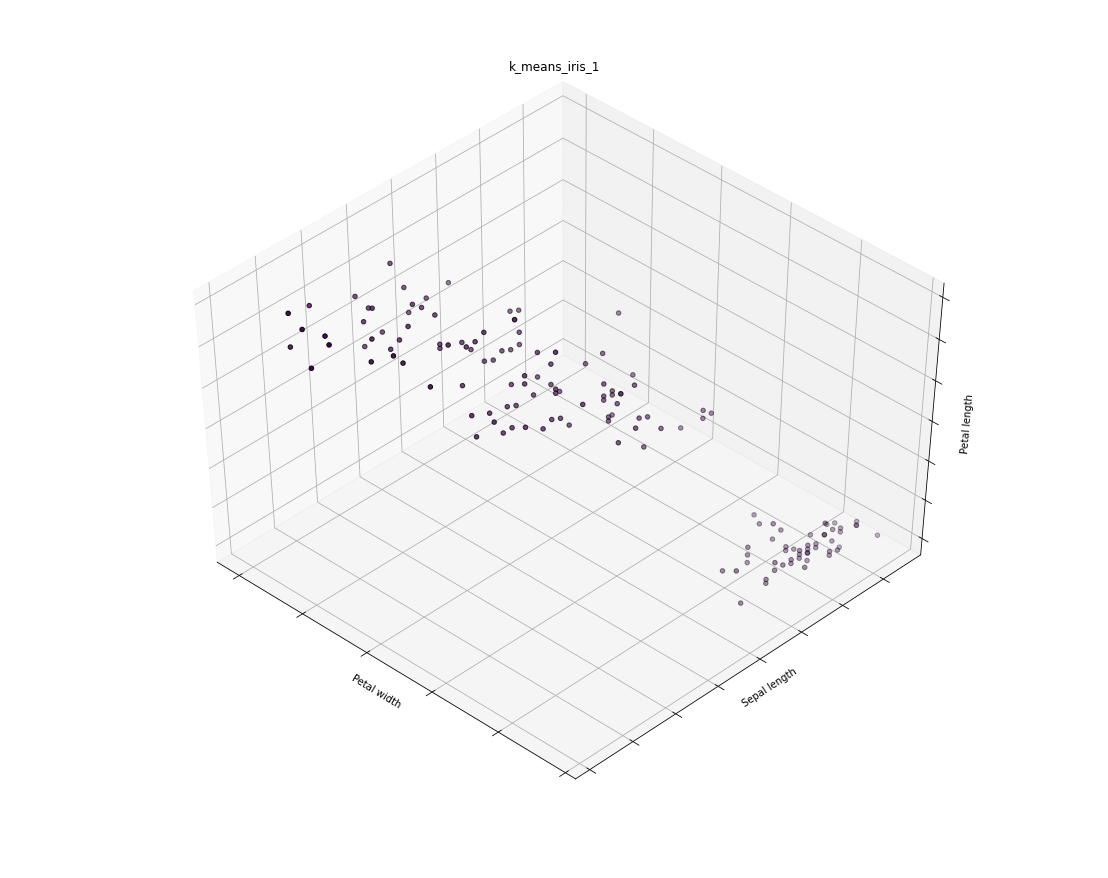

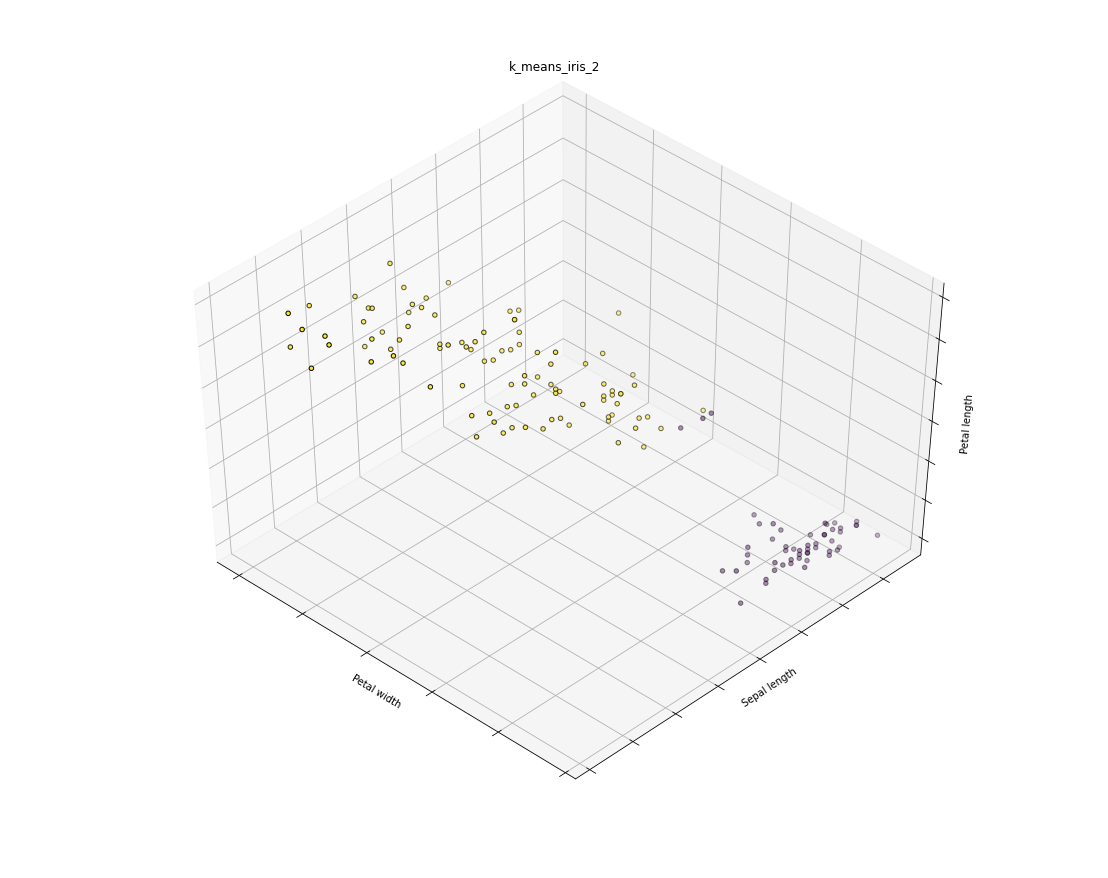

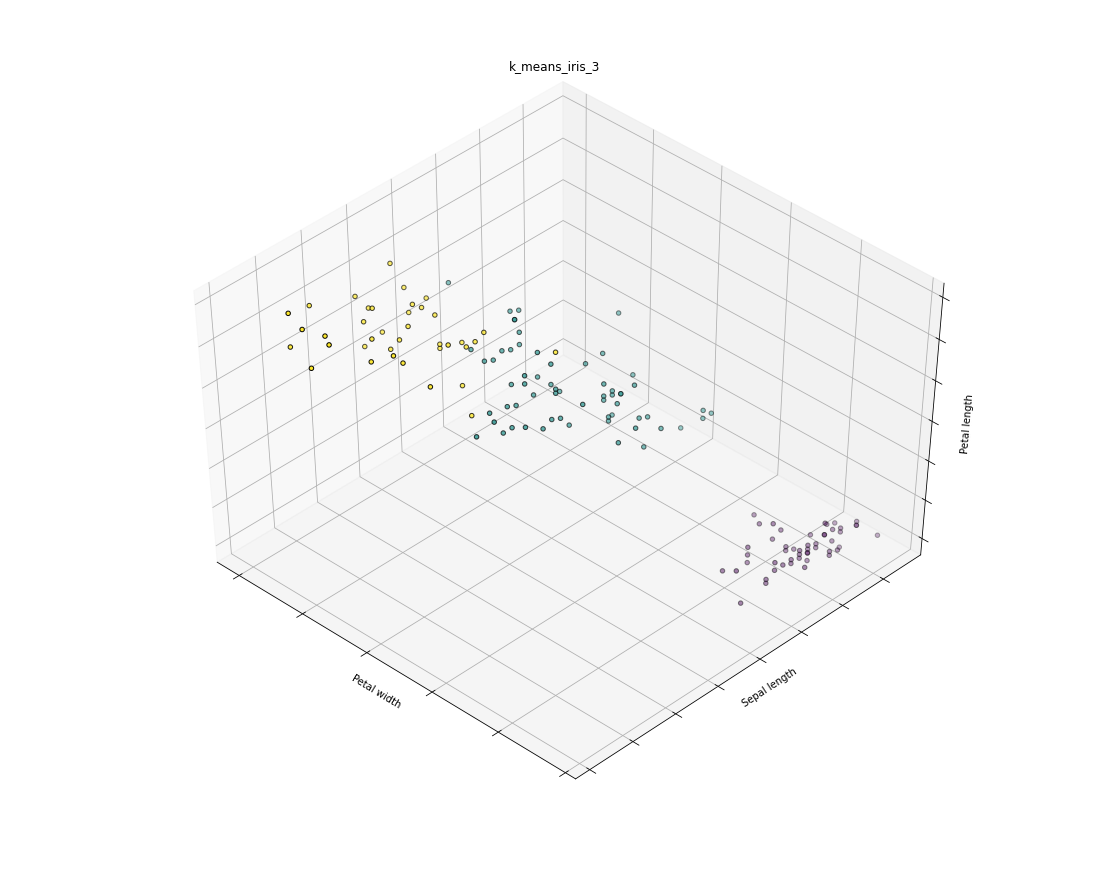

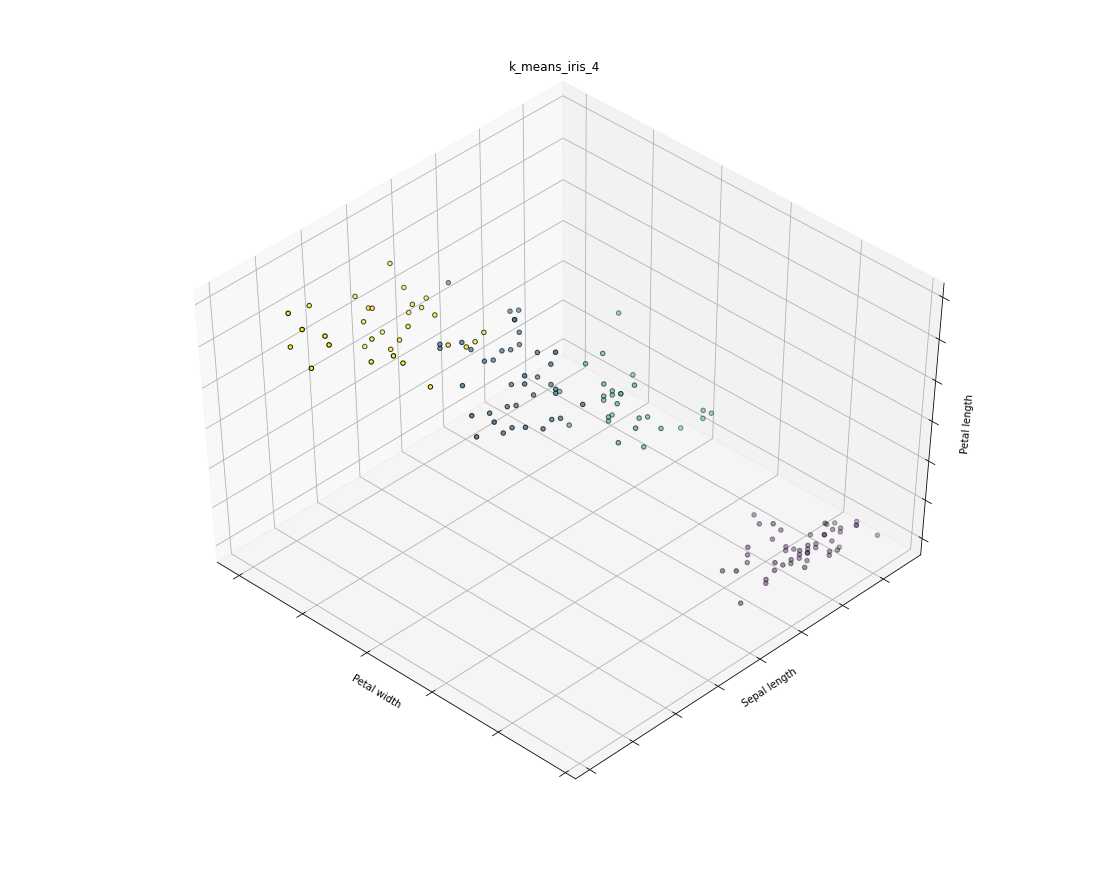

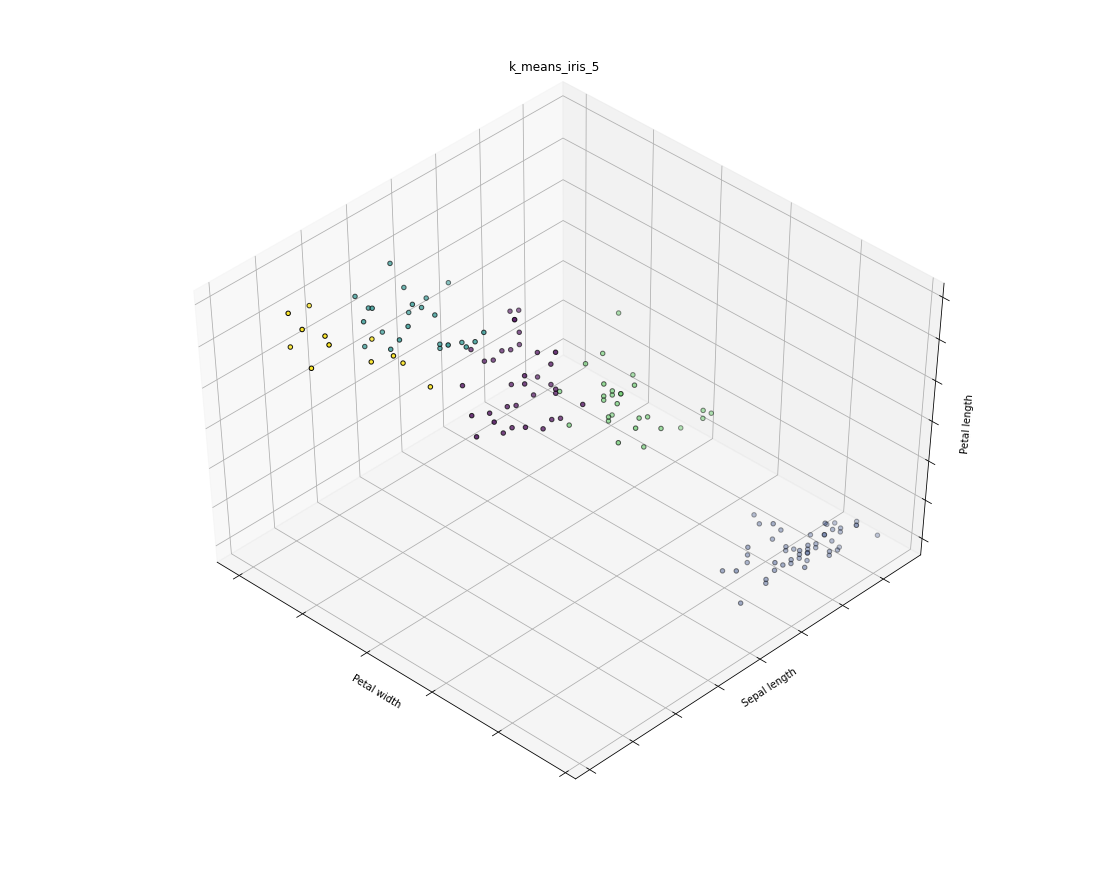

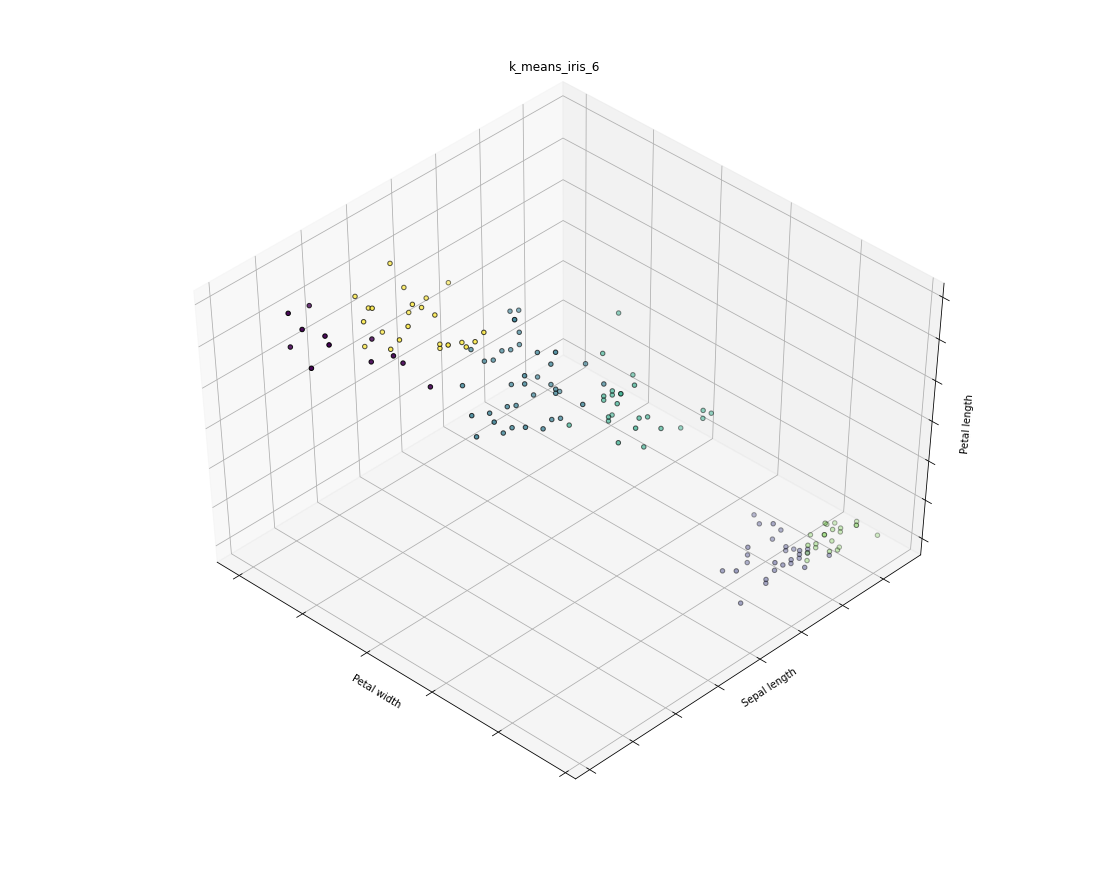

In [15]:
fignum = 1
for name, est in estimators:
  fig = plt.figure(fignum, figsize=(16, 12))
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
  est.fit(X)
  labels = est.labels_

  ax.scatter(X[:, 3], X[:, 0], X[:, 2],
              c=labels.astype(np.float), edgecolor='k')

  ax.w_xaxis.set_ticklabels([])
  ax.w_yaxis.set_ticklabels([])
  ax.w_zaxis.set_ticklabels([])
  ax.set_xlabel('Petal width')
  ax.set_ylabel('Sepal length')
  ax.set_zlabel('Petal length')
  ax.set_title(titles[fignum - 1])
  ax.dist = 12
  fignum = fignum + 1
  fig.show()

### Affichage de la classification réelle

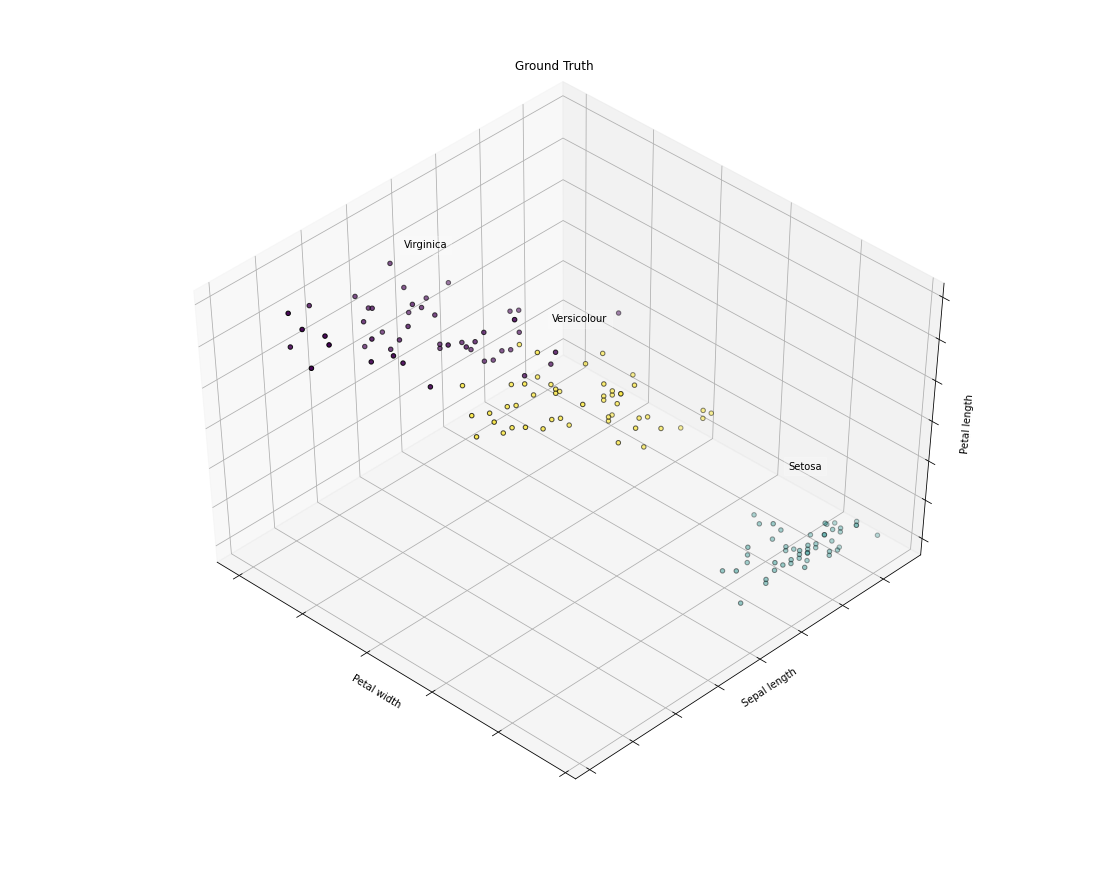

In [16]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

### Nous obtenons la meilleure classification possible avec un nombre de cluster K = 3


# Faire deux modèles pour le choix des centroides :
- Kmeans ++
- Aléatoire

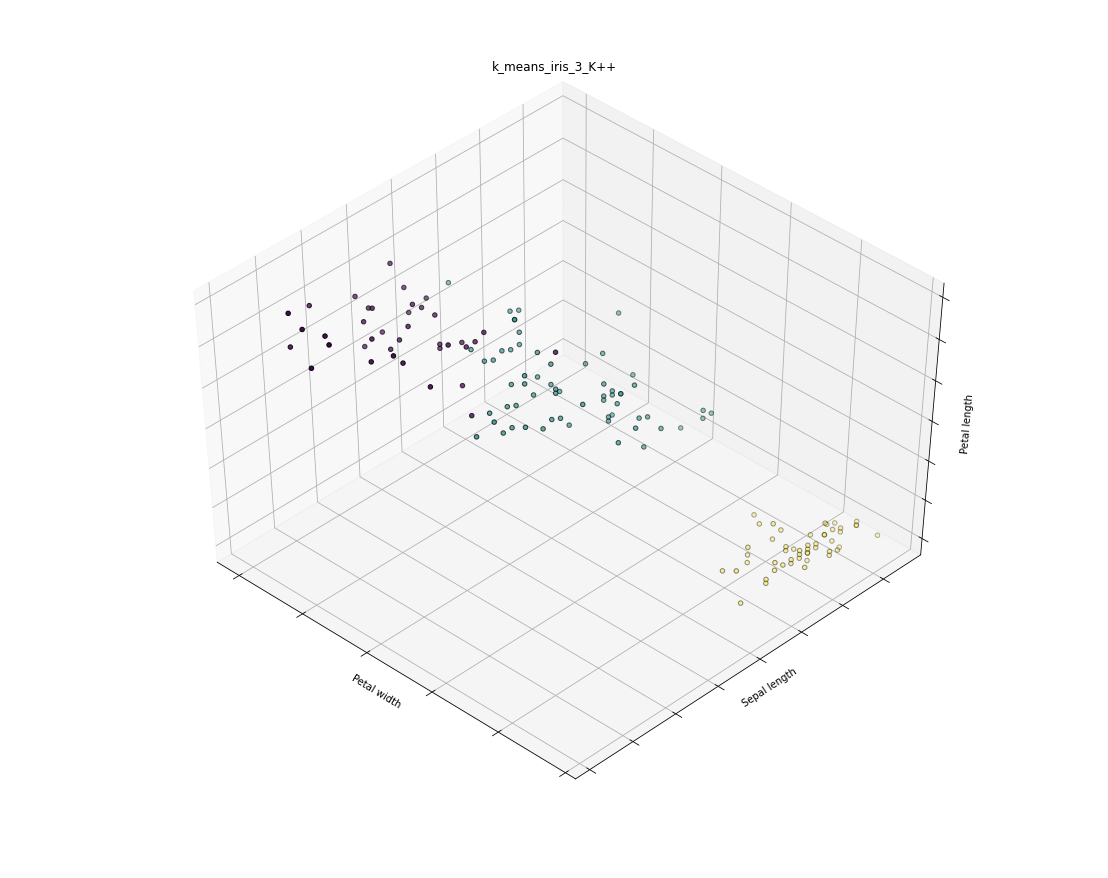

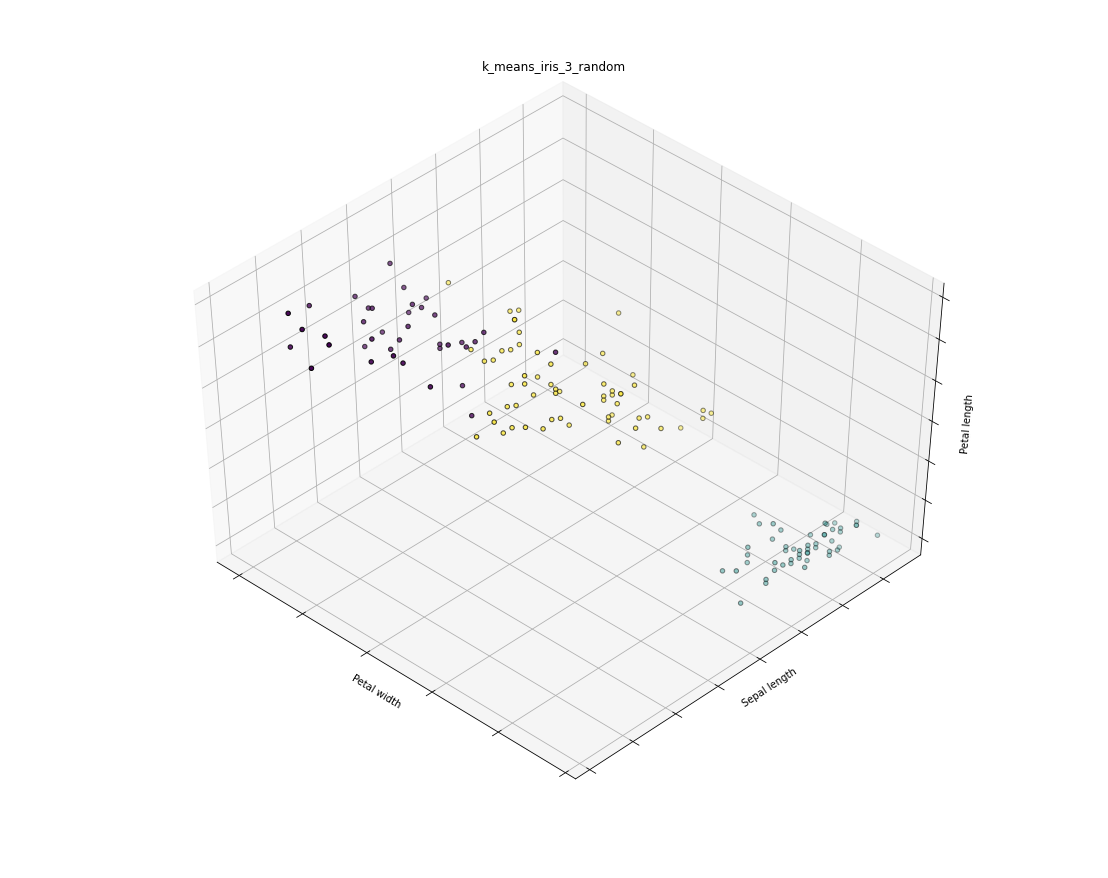

In [17]:
estimators = [('k_means_iris_3_K++', KMeans(n_clusters=3, init='k-means++')),
              ('k_means_iris_3_random', KMeans(n_clusters=3, init='random'))]

fignum = 1
titles = ['k_means_iris_3_K++', 'k_means_iris_3_random']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(16, 12))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Proposer un programme pour l’algoritme de K-means.
## Comparer le avec l’implémentation native de python
## Pouvez-vous indiquer une piste d’amélioration de :
- Votre programme
- Implémentation native


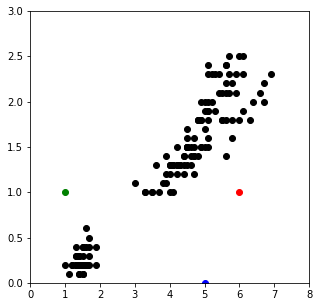

In [18]:
df = pd.DataFrame({
    'x': iris.data[:,2],
    'y':iris.data[:,3]
})


k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 8), np.random.randint(0, 3)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 3)
plt.show()

     x    y  distance_from_1  distance_from_2  distance_from_3  closest color
0  1.4  0.2         4.669047         0.894427         3.605551        2     g
1  1.4  0.2         4.669047         0.894427         3.605551        2     g
2  1.3  0.2         4.767599         0.854400         3.705401        2     g
3  1.5  0.2         4.570558         0.943398         3.505710        2     g
4  1.4  0.2         4.669047         0.894427         3.605551        2     g


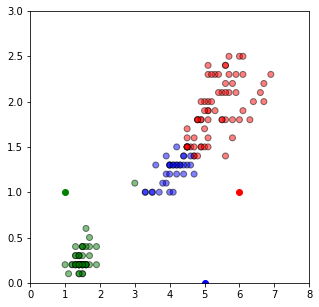

In [19]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 3)
plt.show()

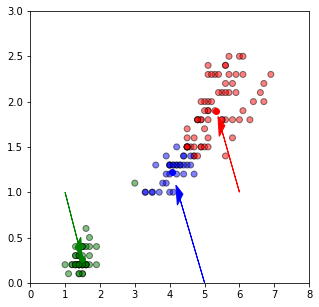

In [20]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 3)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=0.2, head_length=0.2, fc=colmap[i], ec=colmap[i])
plt.show()

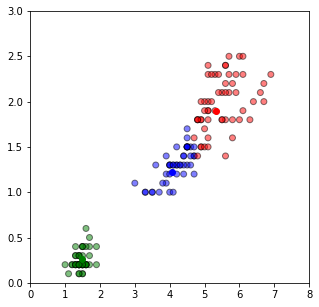

In [21]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 8)
plt.ylim(0, 3)
plt.show()

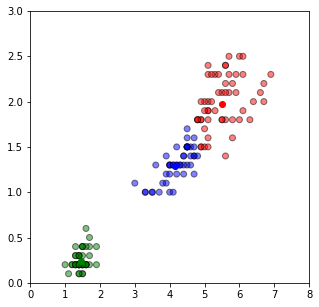

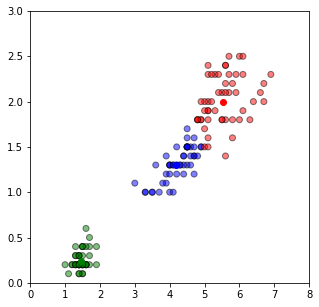

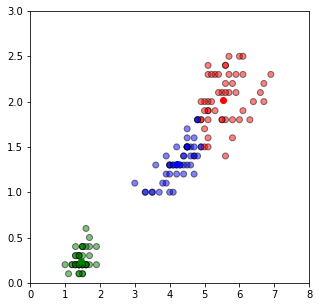

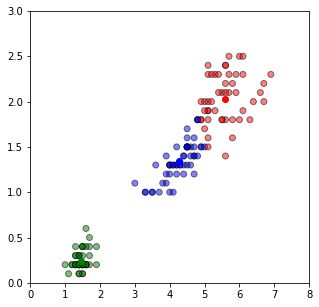

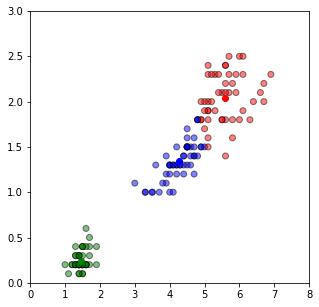

In [22]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)

    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 8)
    plt.ylim(0, 3)
    plt.show()

    if closest_centroids.equals(df['closest']):
        break


blabla il faut commenter


# Exercice 2
Soit l'ensemble D des entiers suivants : D= { [2,7], [5, 8], [10, 11], [18, 20], [2,7], [3, 14], [13,21], [8, 20]} <br/>
On veut répartir les données de D en trois (3) clusters, en utilisant l'algorithme Kmeans. <br/>
La distance d entre deux nombres a et b est calculée ainsi :
d(a , b) = |a - b| (la valeur absolue de a moins b)


In [0]:
X = np.array([ [2,7], [5,8], [10,11], [18, 20], [2,7], [3,14], [13, 21], [8,20],])

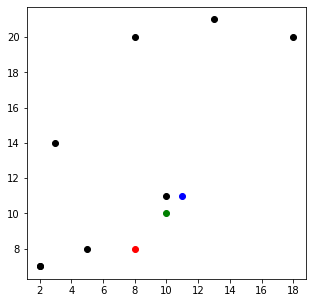

In [24]:
df = pd.DataFrame({
    'x': X[:,0],
    'y':X[:,1]
})


k = 3
# centroids[i] = [x, y]
centroids = {1: [8, 8], 2: [10, 10], 3: [11, 11]}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()


    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   2   7         6.082763         8.544004         9.848858        1     r
1   5   8         3.000000         5.385165         6.708204        1     r
2  10  11         3.605551         1.000000         1.000000        2     g
3  18  20        15.620499        12.806248        11.401754        3     b
4   2   7         6.082763         8.544004         9.848858        1     r


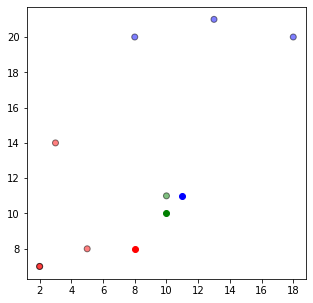

In [25]:
df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

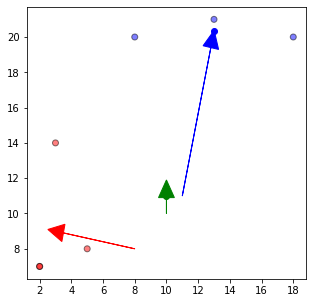

In [26]:
old_centroids = copy.deepcopy(centroids)
centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

for i in old_centroids.keys():
    toto = old_centroids[i][0]
    tata = old_centroids[i][1]
    titi = (centroids[i][0] - old_centroids[i][0]) * 0.90
    tutu = (centroids[i][1] - old_centroids[i][1]) * 0.90
    ax.arrow(toto, tata, titi, tutu, head_width=1, head_length=1, fc=colmap[i], ec=colmap[i])
plt.show()

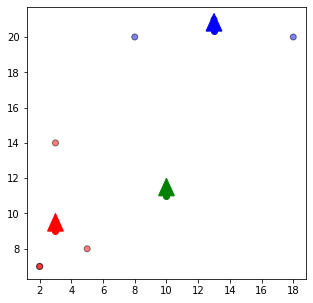

In [27]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = update(centroids)
        
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])

    for i in old_centroids.keys():
        toto = old_centroids[i][0]
        tata = old_centroids[i][1]
        titi = (centroids[i][0] - old_centroids[i][0]) * 0.90
        tutu = (centroids[i][1] - old_centroids[i][1]) * 0.90
        ax.arrow(toto, tata, titi, tutu, head_width=1, head_length=1, fc=colmap[i], ec=colmap[i])
    plt.show()

    if closest_centroids.equals(df['closest']):
        break


# Exercice 3
## Utiliser le générateur « samples_generator» pour générer un jeu de données en utilisant deux formats différents :
- samples_generator.make_moons (prend une seule dimentions)
- samples_generator.make_blobs (peut prendre plusieurs dimensions)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


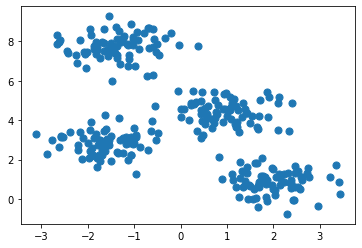

In [28]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

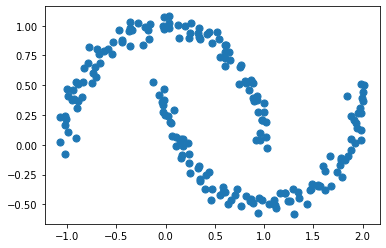

In [29]:
from sklearn.datasets import make_moons
X2, y2 = make_moons(200, noise=.05, random_state=0)
plt.scatter(X2[:, 0], X2[:, 1], s=50);

### Créer un script se basant sur les deux méthodes ci-dessous pour générer un jeu de données artificielles.
### Coder votre propre algorithme en python et appliquer le sur ce jeu de données.

### Avec le jeu généré par make_blobs()


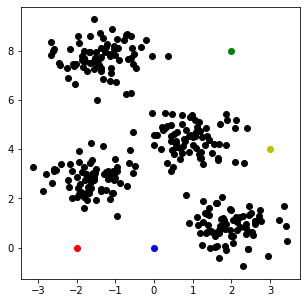

In [30]:
df = pd.DataFrame({
    'x': X[:,0],
    'y':X[:,1]
})


k = 4
# centroids[i] = [x, y]
centroids ={1: [-2, 0], 2: [2, 8], 3: [0, 0], 4:[3, 4]}
    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4:'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

          x         y  distance_from_1  ...  distance_from_4  closest  color
0  0.836857  2.136359         3.551308  ...         2.855231        3      b
1 -1.413658  7.409623         7.432786  ...         5.577267        2      g
2  1.155213  5.099619         5.996789  ...         2.147650        4      y
3 -1.018616  7.814915         7.876294  ...         5.541015        2      g
4  1.271351  1.892542         3.779346  ...         2.725730        3      b

[5 rows x 8 columns]


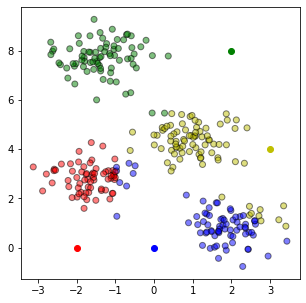

In [31]:
df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

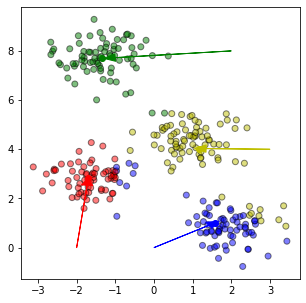

In [32]:
old_centroids = copy.deepcopy(centroids)
centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

for i in old_centroids.keys():
    toto = old_centroids[i][0]
    tata = old_centroids[i][1]
    titi = (centroids[i][0] - old_centroids[i][0]) * 0.90
    tutu = (centroids[i][1] - old_centroids[i][1]) * 0.90
    ax.arrow(toto, tata, titi, tutu, head_width=0.3, head_length=0.3, fc=colmap[i], ec=colmap[i])
plt.show()

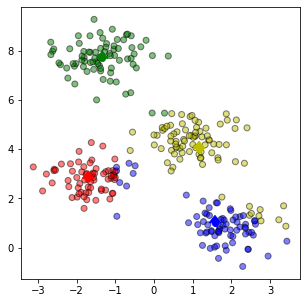

In [33]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = update(centroids)
        
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])

    for i in old_centroids.keys():
        toto = old_centroids[i][0]
        tata = old_centroids[i][1]
        titi = (centroids[i][0] - old_centroids[i][0]) * 0.90
        tutu = (centroids[i][1] - old_centroids[i][1]) * 0.90
        ax.arrow(toto, tata, titi, tutu, head_width=0.3, head_length=0.3, fc=colmap[i], ec=colmap[i])
    plt.show()

    if closest_centroids.equals(df['closest']):
        break

### Avec le jeu généré par make_moons()

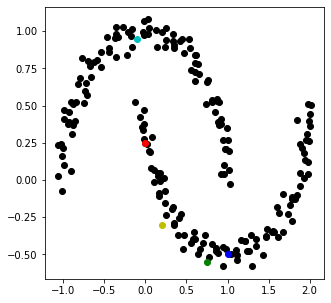

In [34]:
df = pd.DataFrame({
    'x': X2[:,0],
    'y':X2[:,1]
})


k = 5
# centroids[i] = [x, y]
centroids ={1: [0.0, 0.25], 2: [.75, -0.55], 3: [1.0, -0.5], 4:[0.2, -0.3], 5:[-0.1, 0.95]} 

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b', 4:'y', 5:'c'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

          x         y  distance_from_1  ...  distance_from_5  closest  color
0  0.816805  0.521645         0.860791  ...         1.011939        1      r
1  1.618596 -0.379829         1.736819  ...         2.173021        3      b
2 -0.021270  0.273728         0.031866  ...         0.680839        1      r
3 -1.021810 -0.075440         1.072384  ...         1.378862        1      r
4  1.766546 -0.170699         1.815950  ...         2.177145        3      b

[5 rows x 9 columns]


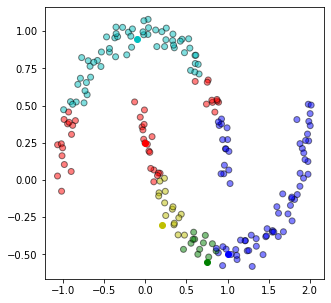

In [35]:
df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

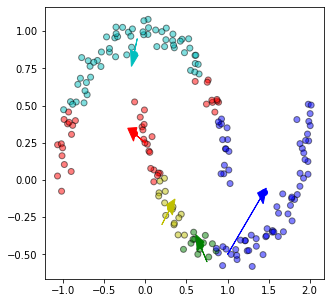

In [36]:
old_centroids = copy.deepcopy(centroids)
centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

for i in old_centroids.keys():
    toto = old_centroids[i][0]
    tata = old_centroids[i][1]
    titi = (centroids[i][0] - old_centroids[i][0]) * 0.90
    tutu = (centroids[i][1] - old_centroids[i][1]) * 0.90
    ax.arrow(toto, tata, titi, tutu, head_width=0.1, head_length=0.1, fc=colmap[i], ec=colmap[i])
plt.show()

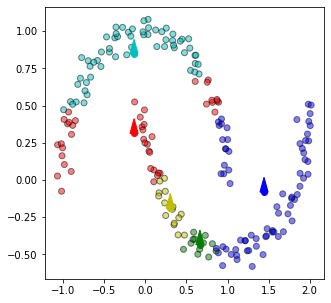

In [37]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = update(centroids)
        
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])

    for i in old_centroids.keys():
        toto = old_centroids[i][0]
        tata = old_centroids[i][1]
        titi = (centroids[i][0] - old_centroids[i][0]) * 0.90
        tutu = (centroids[i][1] - old_centroids[i][1]) * 0.90
        ax.arrow(toto, tata, titi, tutu, head_width=0.1, head_length=0.1, fc=colmap[i], ec=colmap[i])
    plt.show()

    if closest_centroids.equals(df['closest']):
        break